# Loan Prediction

**Objective :** To predict the status of Loan

**Procedure :**

1. To Import all dependent libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

2. Loading the Dataset and Preprocessing

In [ ]:
loan_dataset = pd.read_csv('Loan.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Label Encoding (Loan_Status)

In [ ]:
le = LabelEncoder()
loan_dataset['Loan_Status'] = le.fit_transform(loan_dataset['Loan_Status'])

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Label Encoding (Married, Gender)

In [ ]:
le = LabelEncoder()
loan_dataset['Married'] = le.fit_transform(loan_dataset['Married'])
loan_dataset['Gender'] = le.fit_transform(loan_dataset['Gender'])
loan_dataset['Self_Employed'] = le.fit_transform(loan_dataset['Self_Employed'])
loan_dataset['Property_Area'] = le.fit_transform(loan_dataset['Property_Area'])
loan_dataset['Education'] = le.fit_transform(loan_dataset['Education'])

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


Dependent Column Values

In [ ]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


To replace the values from 3+ to 4

In [ ]:
loan_dataset.replace({'Dependents':{'3+':4}},inplace=True)

In [ ]:
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


3. Data Visualization

Education Vs Loan Status

<Axes: xlabel='Education', ylabel='count'>

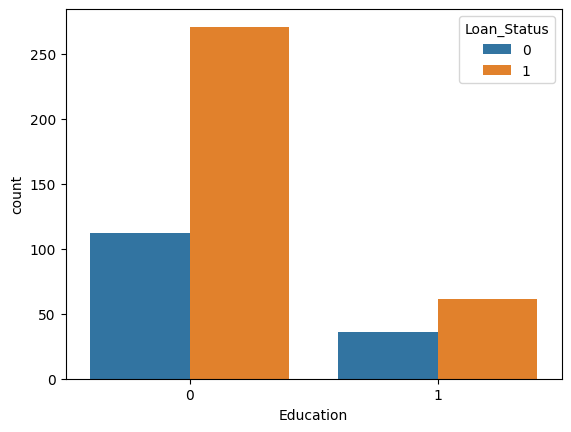

In [ ]:
sns.countplot(x='Education',hue="Loan_Status",data=loan_dataset)

Marital Status Vs Loan Status

<Axes: xlabel='Married', ylabel='count'>

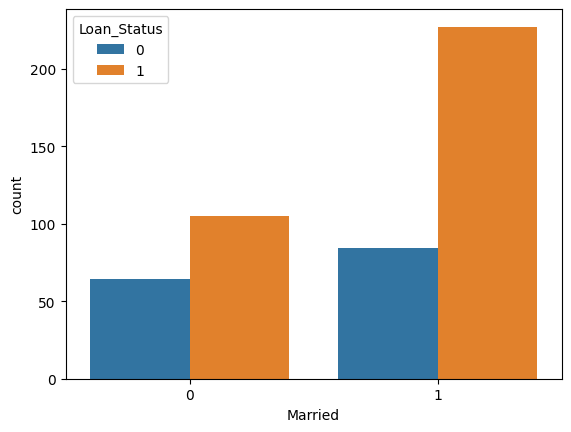

In [ ]:
sns.countplot(x='Married',hue="Loan_Status",data=loan_dataset)

4. Seperating the Datas and Labels

In [ ]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


5. Train and Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(480,) (432,) (48,)


6. Training the Model Using Simple Vector Machine

In [ ]:
classifier = svm.SVC(kernel='linear')

Training the SVM

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

7. Evaluating the Model

Accuracy of the Training Data

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(f"Accuracy of the Training Data : {training_data_accuracy}")

Accuracy of the Training Data : 0.7916666666666666


Accuracy of the Testing Data

In [ ]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(f"Accuracy of the Testing Data : {testing_data_accuracy}")

Accuracy of the Testing Data : 0.8541666666666666


8. Making a Predictive System

In [ ]:
#test data:
# 1. 0,1,2,0,0,4006,1526,168,360,1,2
# 2. 1,0,0,0,0,3510,0,76,360,0,2

input_data = (0,1,2,0,0,4006,1526,168,360,1,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == [1]):
  print("\nThe Loan is Approved")
else:
  print("\nThe Loan is Not Approved")

[1]

The Loan is Approved
